# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [124]:
chocolate_sales = pd.read_csv('https://raw.githubusercontent.com/rezanagita/Clustering-Clasificasion-ML-ProyekAkhir/refs/heads/main/sales_chocolate_cluster.csv')
chocolate_sales

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Perbox_price,Cluster
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180.0,29.555556,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94.0,84.000000,0
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91.0,49.461538,1
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342.0,37.210526,0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184.0,74.375000,0
...,...,...,...,...,...,...,...,...
923,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323.0,13.653251,1
924,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119.0,55.117647,0
925,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217.0,2.645161,1
926,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384.0,5.432292,1


In [126]:
# melakukan label encoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Sales Person', 'Country', 'Product']

# Encode kolom kategorikal
for column in categorical_columns:
    chocolate_sales[column] = label_encoder.fit_transform(chocolate_sales[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
chocolate_sales.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Perbox_price,Cluster
0,13,4,14,2022-01-04,5320.0,180.0,29.555556,1
1,23,2,2,2022-08-01,7896.0,94.0,84.000000,0
2,9,2,17,2022-07-07,4501.0,91.0,49.461538,1
3,12,0,17,2022-04-27,12726.0,342.0,37.210526,0
4,13,4,17,2022-02-24,13685.0,184.0,74.375000,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [127]:
# Normalisasi kolom numerik int & float
scaler = MinMaxScaler()
numeric_columns = chocolate_sales.select_dtypes(include=['int64', 'float64']).columns
chocolate_sales[numeric_columns] = scaler.fit_transform(chocolate_sales[numeric_columns])

# splitt
X = chocolate_sales.drop(columns=['Date','Cluster'])
y = chocolate_sales['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(649, 6), y_train=(649,)
Test set shape: X_test=(279, 6), y_test=(279,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [128]:
# model 1. Random Forest Classifier
rf_model = RandomForestClassifier().fit(X_train, y_train)

# model 2. SVM
svm_model = SVC().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [129]:
# membuat Fungsi untuk mengevaluasi dan mengembalikan hasil
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi 2 model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf_model, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm_model, X_test, y_test),
}

# ringkasan hasil dalam dataframe
hasil_evaluasi_model= pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

hasil_evaluasi_model = pd.DataFrame(rows)

hasil_evaluasi_model

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (RF),1.000000,1.000000,1.000000,1.00000
1,Support Vector Machine (SVM),0.953405,0.955307,0.971591,0.96338


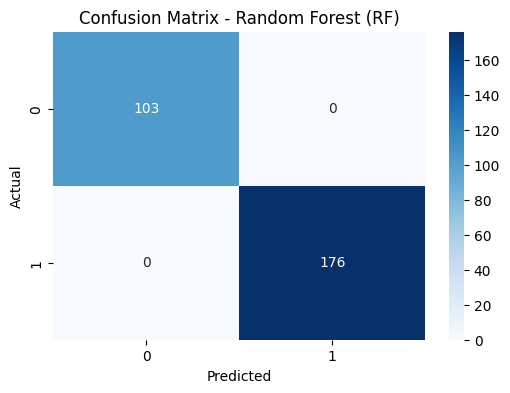

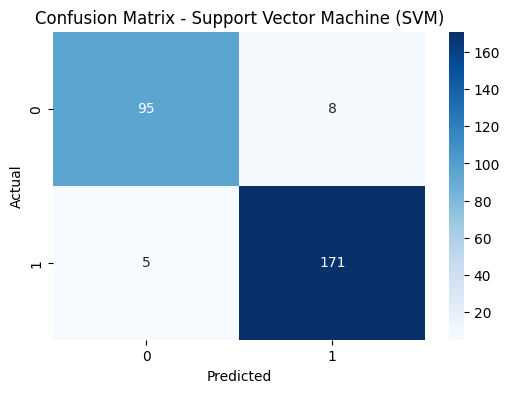

In [130]:
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

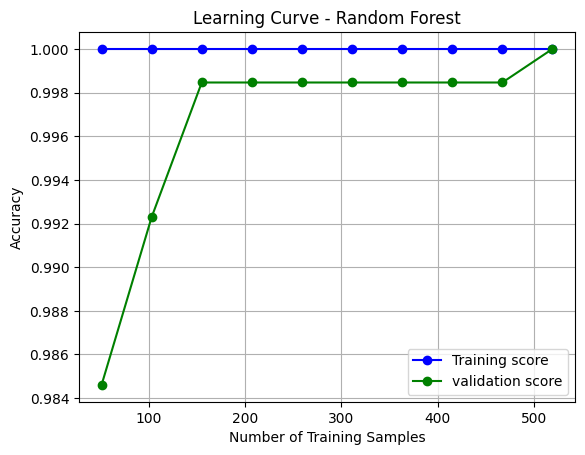

In [131]:
# Menghitung learning curve untuk random forest
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Menghitung rata-rata dan standar deviasi untuk data latih dan uji
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="validation score")
plt.title('Learning Curve - Random Forest')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

plt.show()

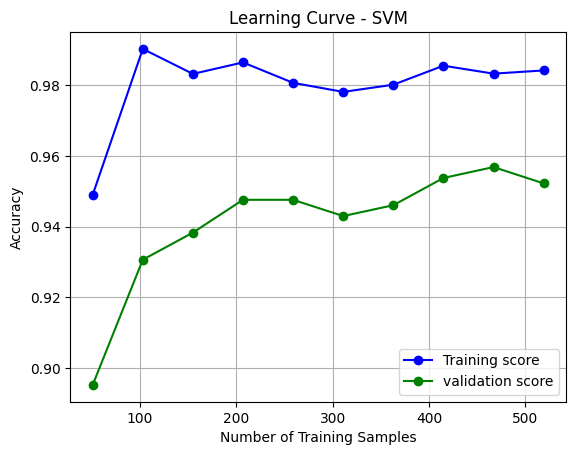

In [121]:
# Menghitung learning curve untuk SVM
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Menghitung rata-rata dan standar deviasi untuk data latih dan uji
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="validation score")
plt.title('Learning Curve - SVM')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

plt.show()

**Hasil Evaluasi dari model random forest & SVM**
* model random forest menghasilkan evaluasi sangat sempurna dibanding dengan model SVM
* model SVM dengan nilai evaluasi lebih rendah menghasilkan Overfitting sedangkan random forest robust terhadap overfitting
* confusion matriks terlihat bahwa random forest tidak ada kesalahan sedangkan SVM memiliki FN = 5 dan FP=8
* dapat disimpulkan random forest merupakan model yang cukup baik dalam klasifikasi dataset ini


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [132]:
param_grid = {
    'C': [0.1, 1, 10, 100],                # C= Regularisasi
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.992283840190817


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [133]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned SVM - Accuracy  : {accuracy:.4f}")
print("Tuned SVM - F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Tuned SVM - Accuracy  : 0.9892
Tuned SVM - F1 Score: 0.9892132923607645


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

* sebelum melakukan tuning terlihat bahwa accuracy & F1 Score lebih rendah
(0.953405	& 0.96338) sedangkan setelah tunning dengan grid search meningkat menjadi ( 0.9892 & 0.9892132923607645 ). hal ini membuktikan bahwa tuning membantu dalam meningkatkan kualitas prediksi model

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    * pada model random forest telah memberikan hasil sempurna dengan tidak adanya kesalahan prediksi, sedangkan model SVM masih memberikan kesalahan prediksi rendah.
  - Apakah model mengalami overfitting atau underfitting?
    * setalah mencoba mendeteksi dengan learning curve untuk melihat apakah kedua model mengalami overfitting atau underfitting, hasilnya model random forest robust terhadap overfitting curve menunjukkan model god fit. berbeda dengan mode SVM menampilkan curve mengalami overfitting

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  * rekomendasi lanjutan --> menambah fitur yang relevan dengan dataset tersebut, karena dataset saat ini masih tergolong kecil
  * menangani overfitting klasifikasi model SVM dapat menggunakan Cross Validation ini akan membantu model menilai secara konsisten pada seluruh data yang ada